In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# 1. Load the dataset
# Ensure the file 'StudentPerformanceFactors.csv' is in your working directory
df = pd.read_csv('/kaggle/input/student-performance-faxtors/StudentPerformanceFactors.csv')

# 2. Data Cleaning (Handling Missing Values)
# Filling missing categorical values with the mode
df['Teacher_Quality'] = df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0])
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0])
df['Distance_from_Home'] = df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0])

# 3. Basic EDA Summary
print("--- Data Description ---")
print(df.describe())

# 4. Outlier Detection (OUTLAYER)
# Using the Interquartile Range (IQR) method for Exam_Score
Q1 = df['Exam_Score'].quantile(0.25)
Q3 = df['Exam_Score'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold_low = Q1 - 1.5 * IQR
outlier_threshold_high = Q3 + 1.5 * IQR
outliers = df[(df['Exam_Score'] < outlier_threshold_low) | (df['Exam_Score'] > outlier_threshold_high)]
print(f"\nNumber of outliers detected in Exam_Score: {len(outliers)}")
# Sampling 100 points for better visibility in the bubble chart
sample_df = df.sample(100, random_state=42)



--- Data Description ---
       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1

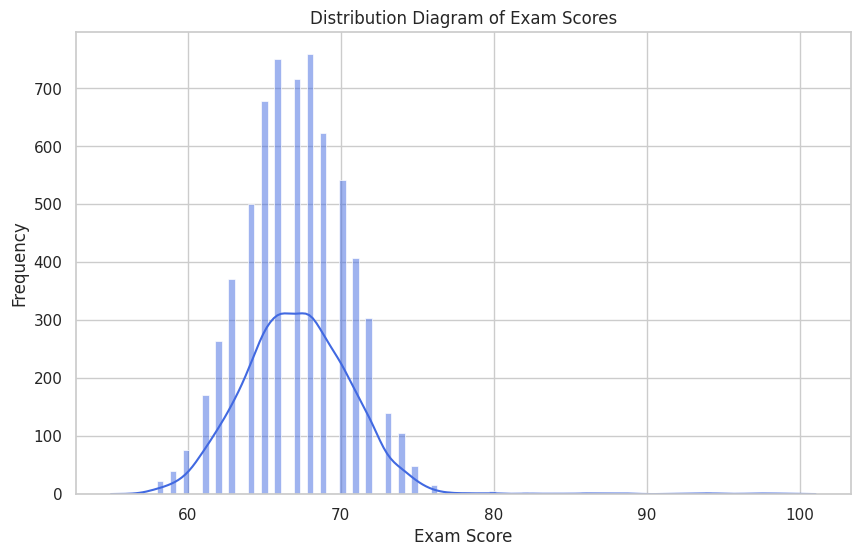

In [2]:
# 5. Visualizations

# A. Distribution Diagram / Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Exam_Score'], kde=True, color='royalblue')
plt.title('Distribution Diagram of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

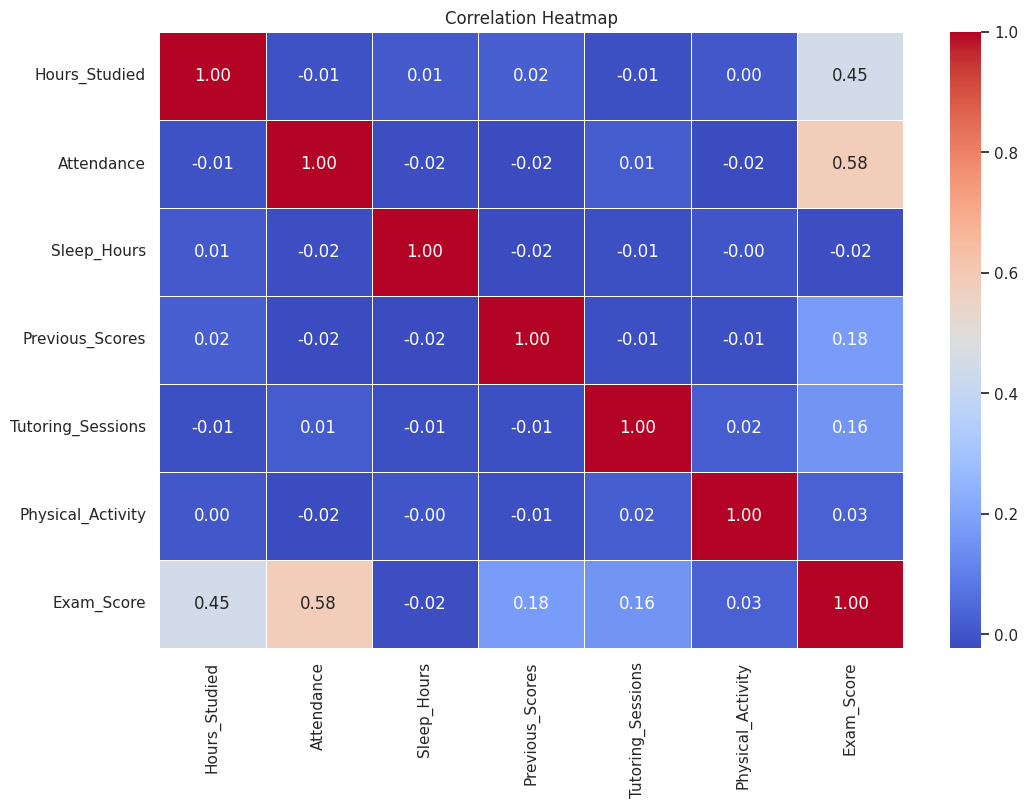

In [3]:
# B. Heatmap (HIT MAP)
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

/tmp/ipykernel_17/15109209.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=df, palette='Set2')


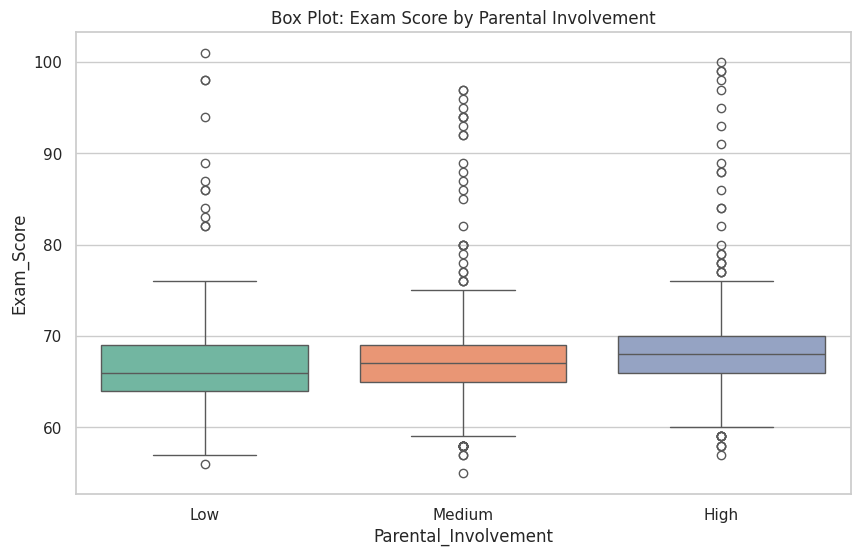

In [4]:
# C. Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=df, palette='Set2')
plt.title('Box Plot: Exam Score by Parental Involvement')
plt.show()

/tmp/ipykernel_17/1923488390.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Exam_Score', data=df, palette='Pastel1')


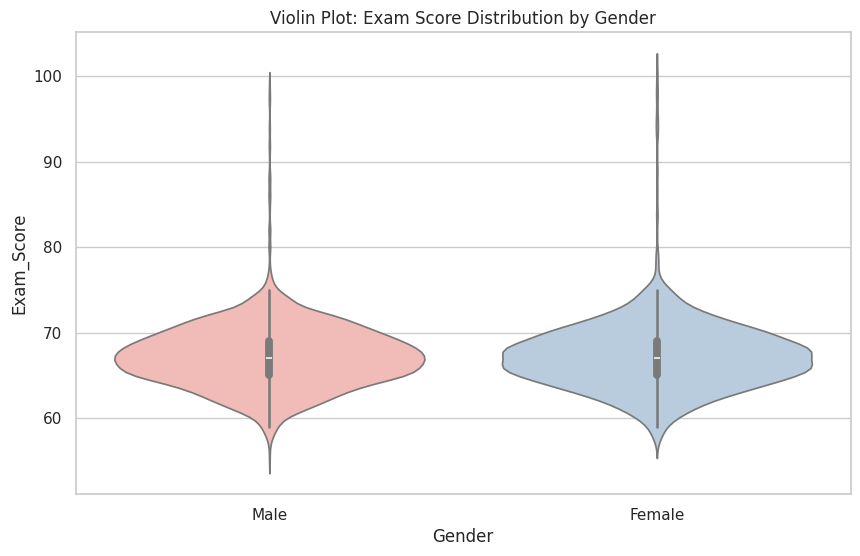

In [5]:
# D. Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Exam_Score', data=df, palette='Pastel1')
plt.title('Violin Plot: Exam Score Distribution by Gender')
plt.show()

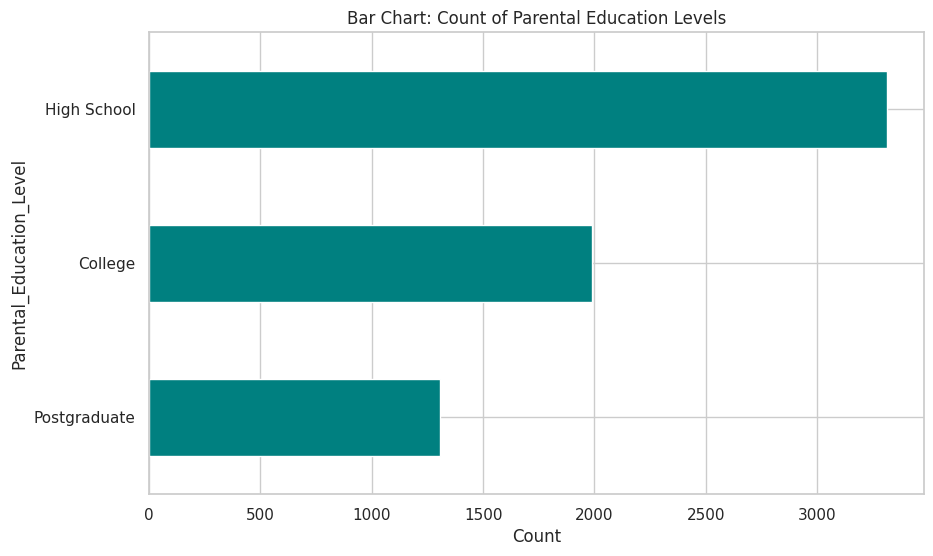

In [6]:
# E. Bar Chart
plt.figure(figsize=(10, 6))
df['Parental_Education_Level'].value_counts().sort_values().plot(kind='barh', color='teal')
plt.title('Bar Chart: Count of Parental Education Levels')
plt.xlabel('Count')
plt.show()

/tmp/ipykernel_17/1019253252.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='School_Type', y='Exam_Score', data=variance_data, palette='viridis')


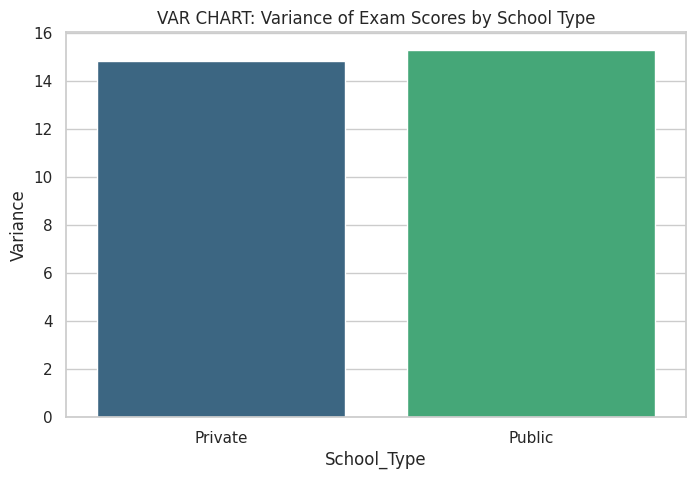

In [7]:
# F. Var Chart (Variance of Scores by School Type)
plt.figure(figsize=(8, 5))
variance_data = df.groupby('School_Type')['Exam_Score'].var().reset_index()
sns.barplot(x='School_Type', y='Exam_Score', data=variance_data, palette='viridis')
plt.title('VAR CHART: Variance of Exam Scores by School Type')
plt.ylabel('Variance')
plt.show()

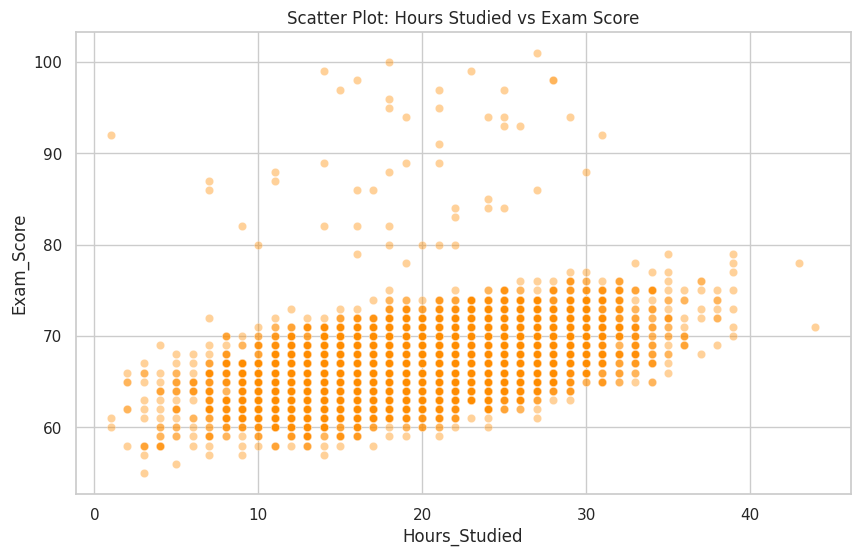

In [8]:
# G. Scatter Plot (SCATER PLOT)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df, alpha=0.4, color='darkorange')
plt.title('Scatter Plot: Hours Studied vs Exam Score')
plt.show()

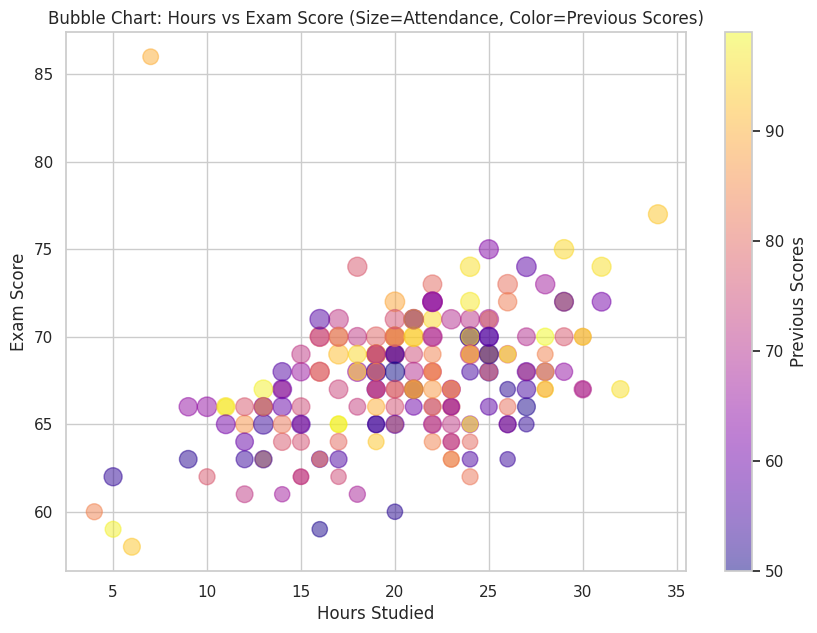

In [9]:
# H. Bubble Chart
plt.figure(figsize=(10, 7))
# Sampled for clarity in visualization
sample_df = df.sample(200)
plt.scatter(sample_df['Hours_Studied'], sample_df['Exam_Score'],
            s=sample_df['Attendance']*2, alpha=0.5, 
            c=sample_df['Previous_Scores'], cmap='plasma')
plt.colorbar(label='Previous Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Bubble Chart: Hours vs Exam Score (Size=Attendance, Color=Previous Scores)')
plt.show()

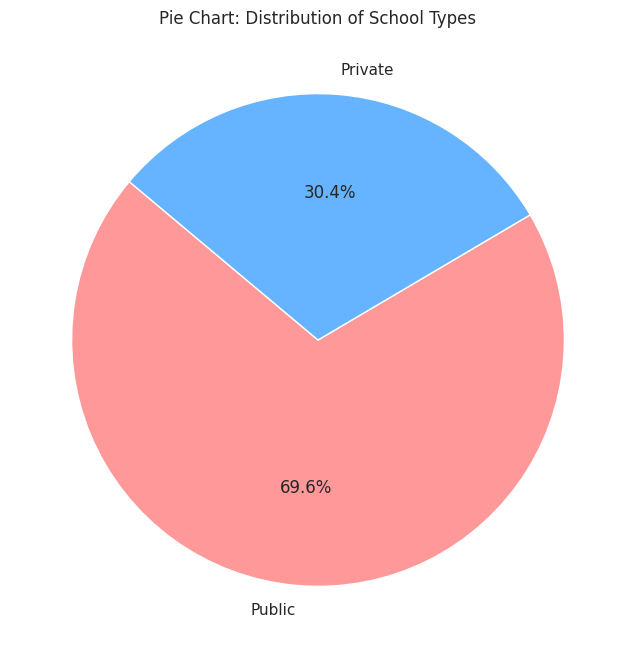

In [10]:
# I. Pie Chart (PI CHART)
plt.figure(figsize=(8, 8))
school_counts = df['School_Type'].value_counts()
plt.pie(school_counts, labels=school_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Pie Chart: Distribution of School Types')
plt.show()

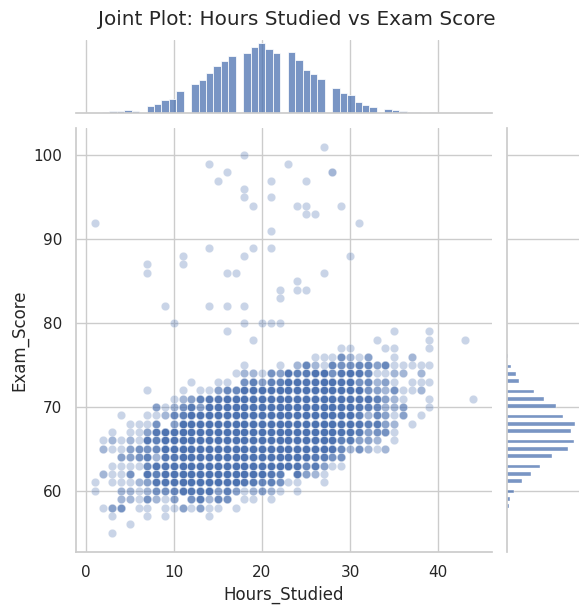

In [11]:
joint_plot = sns.jointplot(data=df, x='Hours_Studied', y='Exam_Score', kind='scatter', alpha=0.3)
joint_plot.fig.suptitle('Joint Plot: Hours Studied vs Exam Score', y=1.02)
plt.savefig('joint_plot.png')

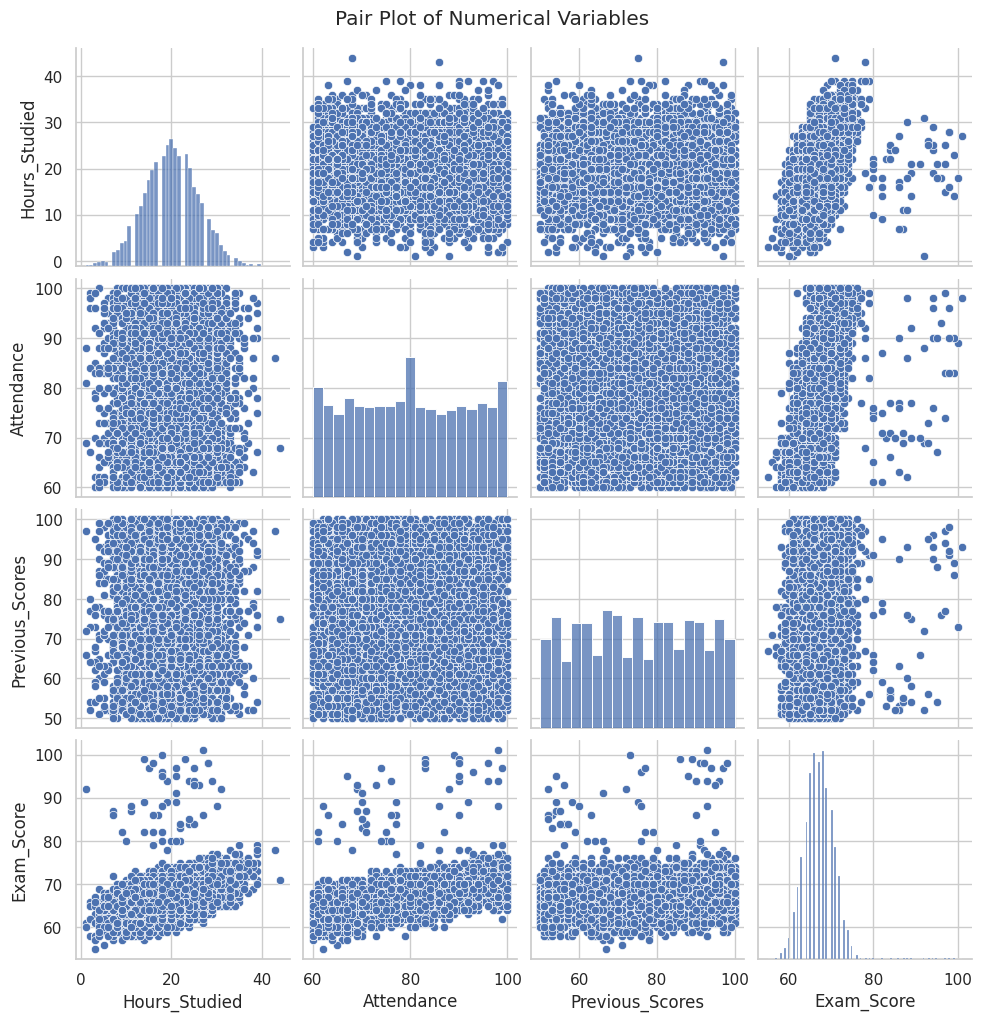

In [12]:
# Selecting specific numerical columns to keep the plot readable
pair_cols = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Exam_Score']
pair_plot = sns.pairplot(df[pair_cols])
pair_plot.fig.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.savefig('pair_plot.png')

/tmp/ipykernel_17/2902038386.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df_clean, x='Parental_Education_Level', y='Exam_Score', palette="Set2")


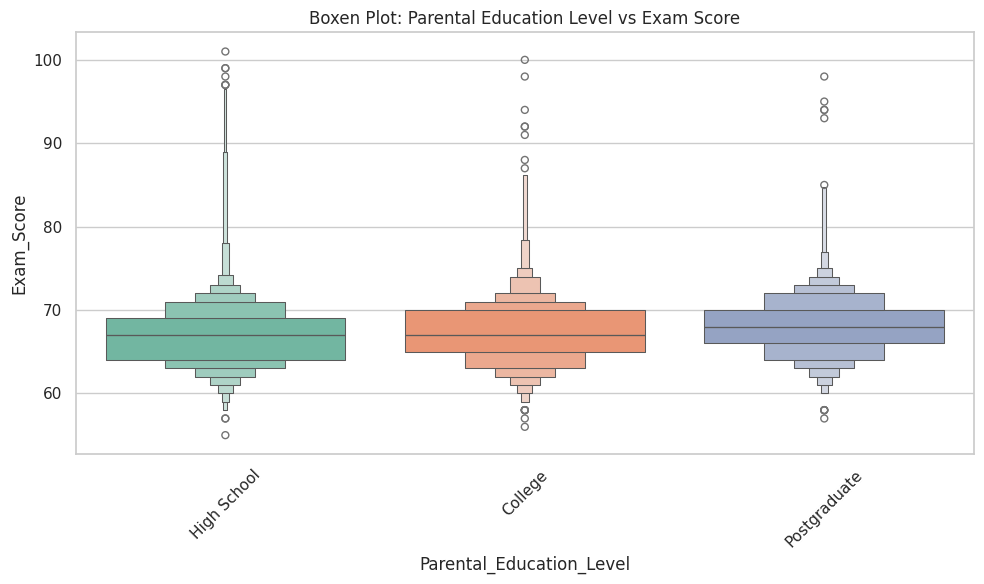

In [13]:

df_clean = df.dropna(subset=['Parental_Education_Level'])

plt.figure(figsize=(10, 6))
sns.boxenplot(data=df_clean, x='Parental_Education_Level', y='Exam_Score', palette="Set2")
plt.title('Boxen Plot: Parental Education Level vs Exam Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('boxen_plot.png')

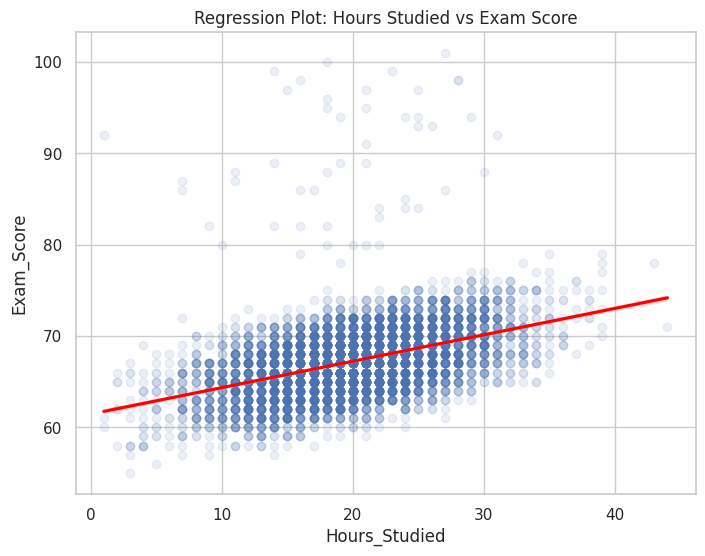

In [14]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='Hours_Studied', y='Exam_Score', 
            scatter_kws={'alpha':0.1}, 
            line_kws={'color':'red'})
plt.title('Regression Plot: Hours Studied vs Exam Score')
plt.savefig('regression_plot.png')